### Importing the required libraries

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

### Making the dataset

We are using the make_blobs function from sklearn to make a dataset of 100 points having two classes x1 and x2


In [2]:
X, Y = make_blobs(n_samples=100, centers=2, n_features=2)
X = pd.DataFrame(X)
X.columns = ['x1', 'x2']
X['x3']=1
X.head()

,x1,x2,x3
0,4.414925,4.041984,1
1,-0.673020,-9.112093,1
2,3.560336,5.355580,1
3,3.322633,4.240135,1
4,1.870837,7.320539,1


Scatter plotting the generated dataset

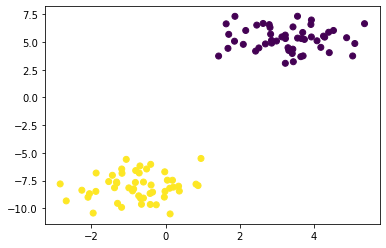

In [3]:
#plot x1 and x2
plt.scatter(X.x1, X.x2, c=Y)
plt.show()

Defining the sigmoid function 

$$ \sigma(z) = \frac{1} {1 + e^{-z}}$$

In [4]:
#sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

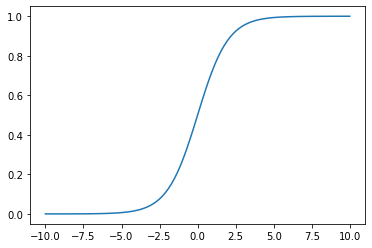

In [5]:
#plot the logistic function
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

### Logistic regression using LMS loss function

We have chosen the initial value of $\theta$ to be random and a bias of 0. The learning rate ($\alpha$) is set to a small value of 0.001 and epochs value of 1000. For our logistic model, we define the hypothesis as following:

$$ h(x) = \sigma(\theta^TX+b) $$



We are using the cross entropy loss function for our gradient descent that is defined as follows:

$$ L = - \frac{1}{2m}(h-y)^2 $$

Then after each iteration of gradient descent we are updating theta follows:

$$ d\theta = \frac{1}{m}(h-y).X * (1-h).h $$
$$ \theta = \theta - \alpha. d\theta^T $$

And updating the bias as follows:

$$ db = \frac{1}{m}(1-h).h * (h - y)$$
$$ b = b - \alpha. db$$


In [6]:
def logistic_regression(X, y, learning_rate=0.001, epochs=1000):
    #initialize theta
    theta = np.random.randn(X.shape[1])
    m = len(y)
    costArr = []
    iters = 0
    bias = 0
    while iters < epochs:
        h = sigmoid((np.dot(X, theta) + bias))
        #lms cost function
        cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
        costArr.append(cost)
        if iters%100==0:
            print("Iteration: ", iters, " Cost: ", cost)
        # dw = (1 / m) * np.dot( h - y, X) 
        dw = (1 / m) * np.dot(h - y, X) * np.dot(1 - h, h)
        db = (1 / m) * np.dot(1 - h, h) * np.sum(h - y)
        theta = theta - learning_rate * dw.T
        bias = bias - learning_rate * db
        iters += 1
    return theta, costArr, bias

### Plotting the loss function 

The plot below shows the loss after every 100 iterations through the dataset

In [7]:
random.seed(1)
theta, costArr, bias = logistic_regression(X, Y)
theta

Iteration:  0  Cost:  0.000747266128247794
Iteration:  100  Cost:  0.0005806776699615173
Iteration:  200  Cost:  0.0004768679573058242
Iteration:  300  Cost:  0.0004057544097280455
Iteration:  400  Cost:  0.00035387330394999255
Iteration:  500  Cost:  0.0003142830870586396
Iteration:  600  Cost:  0.0002830358071450865
Iteration:  700  Cost:  0.0002577175572620289
Iteration:  800  Cost:  0.00023676784433479525
Iteration:  900  Cost:  0.0002191322239630267


array([-0.26683336, -0.77710468,  0.85231887])

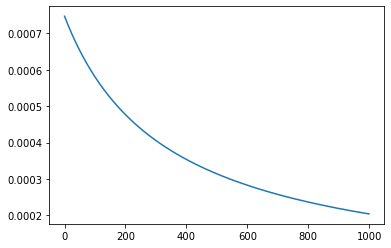

In [8]:
#plotting the cost array
plt.plot(costArr)
plt.show()

### Plotting the Predictions

The plot below visualizes the learnt prediction on the scatter plot of the input training dataset and the line showing the classification of data.

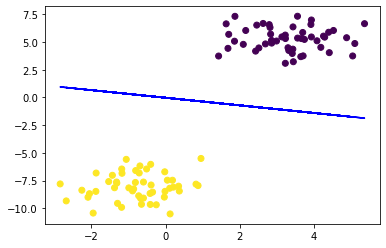

In [9]:
plt.scatter(X.x1, X.x2, c=Y)
plt.plot(X.x1, -(theta[0]*X.x1+bias)/theta[1], 'b')
plt.show()

In [10]:
def predict(X, theta):
    if sigmoid(np.dot(X, theta)) > 0.5:
        return 1 
    else:
        return 0